# Datan luonti kaavojen testausta varten

Tässä notebookissa luodaan dataa, joka lopulta tallennetaan csv-muotoon. Manuaalisesti on vaihdettava viimeisessä solussa csv-tiedoston haluttu nimi.Tässä ei ole käytettyu `np.random.seed()`- funktiota, joten jokaisella kerralla syntyy uusia satunnaisarvoja. 

**Tässä versiossa on muutoksia aiempiin generaatiovalintoihin (syke testin lopussa sekä lihasvoima)**

### Tarvittavat tiedot

1. sukupuoli
2. ikä
3. pituus
4. painoindeksi
5. paino
6. peruskulutus (perusaineenvaihdunta * 1.25)
7. rasvaprosentti
8. rasvaton massa
9. lihasmassa
10. lihasvoima: kyykyt, vatsat, punnerrukset
11. kestävyys: kävelytesti (Vo2max)

In [101]:
# tarvittavat kirjastot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Naiset/ Miehet: 1.sukupuoli, 2. ikä, 3. pituus, 4. painoindeksi, 5. paino

**Datatype:**   
sukupuoli - object  
ikä - int    
pituus - float  
painoindeksi - float  https://ourworldindata.org/obesity  
paino - float  

**RIIPPUVUUDET**:
* Sukupuoli:
* Ikä:
* Pituus: sukupuoli
* Painoindeksi:
* Paino: pituus, painoindeksi

| Painoindeksi (BMI, kg/m²) | Painon luokitus     |
|---------------------------|---------------------|
| < 18,5                    | alipaino            |
| 18,5–24,9                 | normaalipaino       |
| 25,0–29,9                 | ylipaino            |
| 30,0–34,9                 | lihavuus            |
| 35,0–39,9                 | vaikea lihavuus     |

(*laskentakaavat.xlsx : Viitearvoja*)

In [102]:
# määritellään haluttu datan määrä 
n = 20

# Sukupuolen generointi
sukupuoli = np.array(['nainen']*  n)

# Iän generointi 
ikä = np.random.randint(18, 65, n)

# Pituuden generointi (cm), eri sukupuolille eri jakaumat
pituus = np.random.normal(164.7, 7.08, n)   

# Painon generointi (kg), käytetään BMI (body mass index) ja pituus
bmi = np.random.normal(28,6, n) # valittu mielivaltaisesti

bmi = np.clip(bmi, 18,40) #rajataan arvot tietylle välille
paino = bmi * (pituus / 100) ** 2


#luodaan dataframen sarakkeet ja lisätään luodut arrayt niihin
data_naiset = pd.DataFrame({
    'Sukupuoli': sukupuoli,
    'Ikä' : ikä,
    'Pituus (cm)': pituus,
    'Paino (kg)': paino,
    'BMI': bmi})


# Pyöristetään pituus ja paino
data_naiset['Pituus (cm)'] = data_naiset['Pituus (cm)'].round(1)
data_naiset['Paino (kg)'] = data_naiset['Paino (kg)'].round(1)
data_naiset['BMI'] = data_naiset['BMI'].round(1)

data_naiset.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI
0,nainen,37,161.2,86.3,33.2
1,nainen,18,166.9,96.9,34.8
2,nainen,30,168.3,98.8,34.9
3,nainen,50,171.2,117.1,40.0
4,nainen,64,155.5,84.1,34.8


In [103]:
# määritelläään haluttu datan määrä 


n = 20

# Sukupuolen generointi
sukupuoli = np.array(['mies']* n)

# Iän generointi 
ikä = np.random.randint(18, 65, n)

# Pituuden generointi (cm), eri sukupuolille eri jakaumat
pituus = np.random.normal(178.4, 7.59, n)  # ka, keskihajonta, lukumäärä

# Painon generointi (kg), käytetään BMI (body mass index) ja pituus
bmi = np.random.normal(28,6, n) # valittu mielivaltaisesti
bmi = np.clip(bmi, 18,40)  # rajataan arvot halutulle välille
paino = bmi * (pituus / 100) ** 2

data_miehet = pd.DataFrame({
    'Sukupuoli': sukupuoli,
    'Ikä' : ikä,
    'Pituus (cm)': pituus,
    'Paino (kg)': paino,
    'BMI': bmi})


# Pyöristetään pituus ja paino
data_miehet['Pituus (cm)'] = data_miehet['Pituus (cm)'].round(1)
data_miehet['Paino (kg)'] = data_miehet['Paino (kg)'].round(1)
data_miehet['BMI'] = data_miehet['BMI'].round(1)


display(data_miehet.head())

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI
0,mies,54,171.9,109.4,37.0
1,mies,33,170.2,75.1,25.9
2,mies,55,179.7,69.7,21.6
3,mies,45,172.5,91.3,30.7
4,mies,56,168.8,85.1,29.9


### Tutkitaan luotujen arvojen jakautumista naisilla ja miehillä

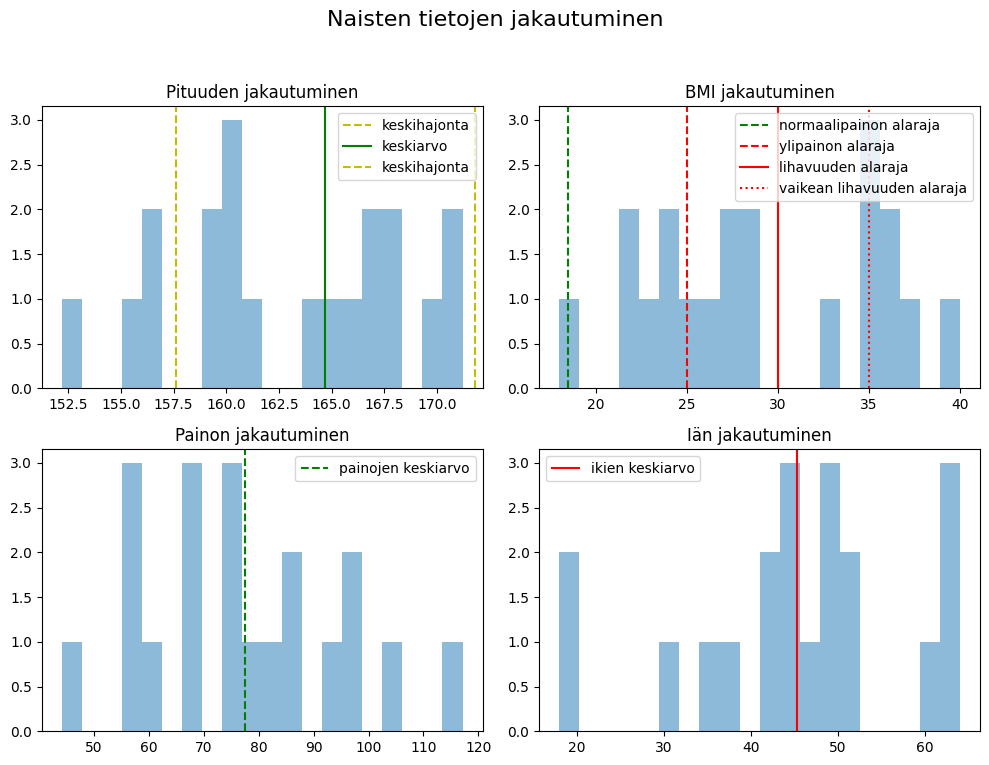

In [104]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2,2,figsize=(10, 8))

# pituuden jakautuminen
axis[0, 0].hist(data_naiset['Pituus (cm)'], bins = 20, alpha=0.5) 
axis[0, 0].set_title("Pituuden jakautuminen") 

# Lisätään pystysuorat viivat merkiksi arvoille
axis[0, 0].axvline(x=(164.7-7.07), color='y', linestyle='--', label='keskihajonta')
axis[0, 0].axvline(x=(164.7), color='g', linestyle='-', label='keskiarvo')
axis[0,0].axvline(x=(164.7+7.07), color='y', linestyle='--', label='keskihajonta')
axis[0, 0].legend()  # Näytetään selite

# For Cosine Function 
axis[0, 1].hist(data_naiset['BMI'], bins = 20, alpha=0.5) 
axis[0, 1].set_title("BMI jakautuminen") 

# Lisätään pystysuorat viivat merkiksi arvoille
axis[0, 1].axvline(x=18.5, color='g', linestyle='--', label='normaalipainon alaraja')
axis[0, 1].axvline(x=25, color='r', linestyle='--', label='ylipainon alaraja')
axis[0,1].axvline(x=30, color='r', linestyle='-', label='lihavuuden alaraja')
axis[0,1].axvline(x=35, color='r', linestyle=':', label='vaikean lihavuuden alaraja')
axis[0, 1].legend()  # Näytetään selite

# For Tangent Function 
axis[1, 0].hist(data_naiset['Paino (kg)'], bins = 20, alpha=0.5)  
axis[1, 0].set_title("Painon jakautuminen") 
axis[1,0].axvline(x=data_naiset['Paino (kg)'].mean(), color='g', linestyle='--', label='painojen keskiarvo')
axis[1,0].legend()  # Näytetään selite

# For Tanh Function 
axis[1, 1].hist(data_naiset['Ikä'], bins = 20, alpha=0.5)  
axis[1, 1].set_title("Iän jakautuminen") 
axis[1,1].axvline(x=data_naiset['Ikä'].mean(), color='r', linestyle='-', label='ikien keskiarvo')
axis[1,1].legend()


# Lisätään pääotsikko
figure.suptitle('Naisten tietojen jakautuminen', fontsize=16)

# Parannetaan alikuvioiden asettelua
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

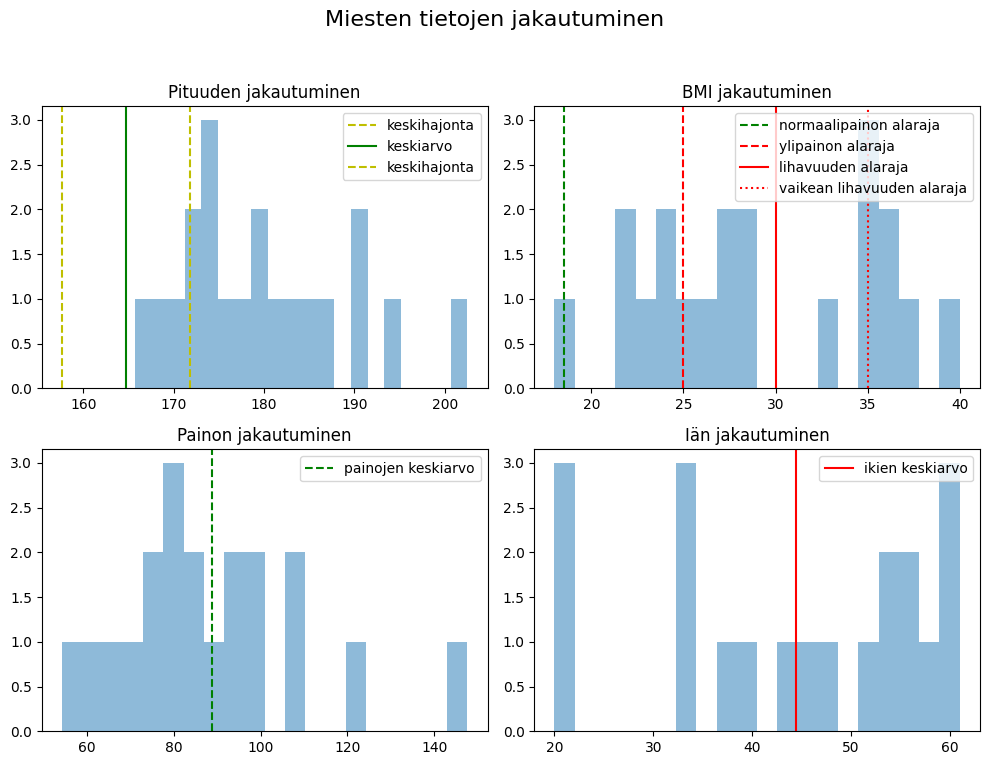

In [105]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2,2,figsize=(10, 8))

# pituuden jakautuminen
axis[0, 0].hist(data_miehet['Pituus (cm)'], bins = 20, alpha=0.5) 
axis[0, 0].set_title("Pituuden jakautuminen") 

# Lisätään pystysuorat viivat merkiksi arvoille
axis[0, 0].axvline(x=(164.7-7.07), color='y', linestyle='--', label='keskihajonta')
axis[0, 0].axvline(x=(164.7), color='g', linestyle='-', label='keskiarvo')
axis[0,0].axvline(x=(164.7+7.07), color='y', linestyle='--', label='keskihajonta')
axis[0, 0].legend()  # Näytetään selite

# For Cosine Function 
axis[0, 1].hist(data_naiset['BMI'], bins = 20, alpha=0.5) 
axis[0, 1].set_title("BMI jakautuminen") 

# Lisätään pystysuorat viivat merkiksi arvoille
axis[0, 1].axvline(x=18.5, color='g', linestyle='--', label='normaalipainon alaraja')
axis[0, 1].axvline(x=25, color='r', linestyle='--', label='ylipainon alaraja')
axis[0,1].axvline(x=30, color='r', linestyle='-', label='lihavuuden alaraja')
axis[0,1].axvline(x=35, color='r', linestyle=':', label='vaikean lihavuuden alaraja')
axis[0, 1].legend()  # Näytetään selite

# For Tangent Function 
axis[1, 0].hist(data_miehet['Paino (kg)'], bins = 20, alpha=0.5)  
axis[1, 0].set_title("Painon jakautuminen") 
axis[1,0].axvline(x=data_miehet['Paino (kg)'].mean(), color='g', linestyle='--', label='painojen keskiarvo')
axis[1,0].legend()  # Näytetään selite

# For Tanh Function 
axis[1, 1].hist(data_miehet['Ikä'], bins = 20, alpha=0.5)  
axis[1, 1].set_title("Iän jakautuminen") 
axis[1,1].axvline(x=data_miehet['Ikä'].mean(), color='r', linestyle='-', label='ikien keskiarvo')
axis[1,1].legend()

# Lisätään pääotsikko
figure.suptitle('Miesten tietojen jakautuminen', fontsize=16)

# Parannetaan alikuvioiden asettelua
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Huomioita iän jakautumisesta: painot arvottuu välin ala- ja yläpäihin, pitäisikö muodostaa jollakin jakaumalla?

In [106]:
# yhdistetään data
data = pd.concat([data_naiset, data_miehet], ignore_index=True)
data.describe()

,Ikä,Pituus (cm),Paino (kg),BMI
count,40.000000,40.000000,40.000000,40.000000
mean,44.850000,171.330000,83.080000,28.225000
std,13.076795,11.519397,20.758689,5.964586
min,18.000000,152.200000,44.200000,18.000000
25%,36.750000,163.375000,69.350000,23.700000
50%,45.500000,169.950000,79.900000,27.100000
75%,54.250000,177.700000,95.550000,33.300000
max,64.000000,202.500000,147.600000,40.000000


### 6. Peruskulutus vuorokaudessa
**Lasketaan vuorokausikulutuksen arvo alkutietojen perusteella ja lisätään se dataan**  
Kaavana käytetään Harris-Benedict versiota. Saatu perusaineenvaihdunta kerrotaan 1.25 arvolla, jotta saadaan vuorokauden peruskulutus (arkiaskaareet yms.)

**RIIPPUVUUDET**:
* ikä
* paino
* pituus

In [107]:
def vrk_perusaineenvaihdunta(sukupuoli, paino, pituus, ikä):
    if sukupuoli == 'mies':
        pav = 88.362 + (13.397 * paino) + (4.799 * pituus) - (5.677 * ikä)
        vrk_pav = pav + (pav * 0.1) + (pav * 0.15) 
    else:
        pav = 447.593 + (9.247 * paino) + (3.098 * pituus) - (4.330 * ikä)
        vrk_pav = pav + (pav * 0.1) + (pav * 0.15) 
    
    return vrk_pav

In [108]:
# Lisää lihasmassa sarake
data['Vuorokausiaineenvaihdunta'] = data.apply(lambda row: vrk_perusaineenvaihdunta(row['Sukupuoli'], row['Paino (kg)'], row['Pituus (cm)'], row['Ikä']), axis=1)
data['Vuorokausiaineenvaihdunta']=data['Vuorokausiaineenvaihdunta'].astype(int)
data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta
0,nainen,37,161.2,86.3,33.2,1980
1,nainen,18,166.9,96.9,34.8,2228
2,nainen,30,168.3,98.8,34.9,2190
3,nainen,50,171.2,117.1,40.0,2305
4,nainen,64,155.5,84.1,34.8,1787


### 7. rasvaprosentti

**Datatype:** float


`1.20 * bmi + 0.23 * ikä - 10.8 * sukupuoli - 5.4`   
if sukupuoli == 'mies' &#x27A1; 1
if sukupuoli == 'nainen' &#x27A1; 0  
https://fi.wikipedia.org/wiki/Rasvaprosentti  

Kohinaa lisätessä valitsin mielivaltaisesti normaalijakauman keskiarvolla 0 ja keskihajonnalla 4.  
Rajasin arvot eri väleille sukupuolen perusteella.
* Naiset 14-40
* Miehet 8-30


**RIIPPUVUUS**: 
* sukupuoli
* ikä
* painoindeksi

*In adults the prediction formula was: BF% = 1.20 x BMI + 0.23 x age - 10.8 x sex - 5.4 (R2 0.79, SEE = 4.1% BF%).* https://pubmed.ncbi.nlm.nih.gov/2043597/ 

 

In [109]:
# Rasvaprosentin laskeminen
data['Rasvaprosentti'] = 1.20 * data['BMI'] + 0.23 * data['Ikä'] - 10.8 * (data['Sukupuoli'] == 'mies') - 5.4

# Lisätään kohina rasvaprosenttiin
n = len(data)
kohina = np.random.normal(0, 4, size=n)  # Keskihajonnaksi valittu 4
data['Rasvaprosentti'] = round(data['Rasvaprosentti'] + kohina,1)

# Rajataan rasvaprosentin arvot sukupuolen perusteella
data['Rasvaprosentti'] = np.where(
    data['Sukupuoli'] == 'mies',
    np.clip(data['Rasvaprosentti'], 8, 30),
    np.clip(data['Rasvaprosentti'], 14, 40)
)

data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti
0,nainen,37,161.2,86.3,33.2,1980,40.0
1,nainen,18,166.9,96.9,34.8,2228,38.5
2,nainen,30,168.3,98.8,34.9,2190,40.0
3,nainen,50,171.2,117.1,40.0,2305,40.0
4,nainen,64,155.5,84.1,34.8,1787,40.0


In [110]:
# Rasvaprosentin laskeminen
data['Rasvamassa (kg)'] = round(data['Rasvaprosentti'] / 100 * data['Paino (kg)'],1)
data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg)
0,nainen,37,161.2,86.3,33.2,1980,40.0,34.5
1,nainen,18,166.9,96.9,34.8,2228,38.5,37.3
2,nainen,30,168.3,98.8,34.9,2190,40.0,39.5
3,nainen,50,171.2,117.1,40.0,2305,40.0,46.8
4,nainen,64,155.5,84.1,34.8,1787,40.0,33.6


### 8. rasvaton massa (kg)

**Datatype:** float

rasvaton massa = paino * (1 - rasvaprosentti/100)

**RIIPPUVUUS**:
* rasvaprosentti

(Rasvattoman massan laskulle on oma kaavansa: https://en.wikipedia.org/wiki/Lean_body_mass)

In [111]:
# Lasketaan rasvaton massa
data['Rasvaton massa (kg)'] = round(data['Paino (kg)'] * (1 - data['Rasvaprosentti'] / 100),1)

data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg)
0,nainen,37,161.2,86.3,33.2,1980,40.0,34.5,51.8
1,nainen,18,166.9,96.9,34.8,2228,38.5,37.3,59.6
2,nainen,30,168.3,98.8,34.9,2190,40.0,39.5,59.3
3,nainen,50,171.2,117.1,40.0,2305,40.0,46.8,70.3
4,nainen,64,155.5,84.1,34.8,1787,40.0,33.6,50.5


### 9. lihasmassa (kg)

**Datatype:** float

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7012897/ -> lihasmassan laskentakaavat:

Miehet: SM = 0.23xW + 0.15xH – 0.058xA – 0.0005 x A² – 13.2

Naiset: SM = 0.19xW + 0.11xH – 0.095xA + 0.0003x A²  – 9.0

Kaavaa käytettäessä olen lisännyt mielivaltaisesti kohinaa normaalijakauman standardipoikkeamalla 3. 

**RIIPPUVUUS**:
* paino
* pituus
* ikä

* Ilman kaavaa laskettaessa: rasvaton massa (-> lihasmassa tietty osuus lihasmassasta), ikä

In [112]:
# funktio lihasmassan lisäämiseen
def lihasmassa(sukupuoli, paino, pituus, ika):
    if sukupuoli.lower() == 'mies':
        result = 0.23*paino + 0.15*pituus - 0.058*ika - 0.0005*ika**2 - 13.2
    else:
        result = 0.19*paino + 0.11*pituus - 0.095*ika + 0.0003*ika**2 - 9.0
    
    # Lisätään hajonta (satunnainen poikkeama)
    hajonta = np.random.normal(scale=3.0)  #hajonta valittu standardipoikkeamalla 3.0
    result += hajonta
    
    return round(result, 1)

In [113]:
# Lisää lihasmassa sarake
data['Lihasmassa (kg)'] = data.apply(lambda row: lihasmassa(row['Sukupuoli'], row['Paino (kg)'], row['Pituus (cm)'], row['Ikä']), axis=1)

data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg)
0,nainen,37,161.2,86.3,33.2,1980,40.0,34.5,51.8,19.8
1,nainen,18,166.9,96.9,34.8,2228,38.5,37.3,59.6,21.3
2,nainen,30,168.3,98.8,34.9,2190,40.0,39.5,59.3,25.2
3,nainen,50,171.2,117.1,40.0,2305,40.0,46.8,70.3,27.7
4,nainen,64,155.5,84.1,34.8,1787,40.0,33.6,50.5,17.2


#### Verrataan lihasmassan osuutta rasvattomaan massaan 

In [114]:
data['Lihasmassan osuus rasvattomasta'] = round(data['Lihasmassa (kg)'] / data['Rasvaton massa (kg)'],2)
data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta
0,nainen,37,161.2,86.3,33.2,1980,40.0,34.5,51.8,19.8,0.38
1,nainen,18,166.9,96.9,34.8,2228,38.5,37.3,59.6,21.3,0.36
2,nainen,30,168.3,98.8,34.9,2190,40.0,39.5,59.3,25.2,0.42
3,nainen,50,171.2,117.1,40.0,2305,40.0,46.8,70.3,27.7,0.39
4,nainen,64,155.5,84.1,34.8,1787,40.0,33.6,50.5,17.2,0.34


### Kävelytestin viitearvon laskeminen ja siitä tulosten generointi

**Step 1. viitearvojen laskeminen pituuden, painon ja iän perusteella**  
**Step 2. tulosten generointi lisämällä random arvo väliltä esim. -200 - 200 viitearvoon**  

**Kuuden minuutin kävelytestin viitearvotaulukosta löytyy seuraavat kaavat:**

Miehet: (7,57 x pituus cm) - (5,02 x ikä v) - (1,76 x paino kg) - 309 m

Naiste: (2,11 x pituus cm) - (5,78 x ikä v) - (2,29 x paino kg) - 667 m  
([Lähde myös täällä](https://www.atsjournals.org/doi/10.1164/ajrccm.158.5.9710086))
https://www.atsjournals.org/doi/10.1164/ajrccm.158.5.9710086?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%20%200pubmed

````
Men:
6MWD = (7.57 × heightcm) − (5.02 × age) − (1.76 × weightkg) − 309 m.Alternate equation using BMI*:
6MWD = 1,140 m − (5.61 × BMI) − (6.94 × age)
When using either equation, subtract 153 m for the LLN
Women:
6MWD = (2.11 × heightcm) − (2.29 × weightkg) − (5.78 × age) + 667 m.Alternate equation using BMI:
6MWD = 1,017 m − (6.24 × BMI) − (5.83 × age)
When using either equation, subtract 139 m for the LLN
````


In [115]:
def walk_test_reference_value(sukupuoli: str, pituus: float, ikä: float, paino: float):
    """
    Kävelytestin viitearvojen laskeminen
    """
    if sukupuoli.lower() == 'mies':
        value = (7.57*pituus) - (5.02*ikä) - (1.76*paino) - 309
    else: 
        value = (2.11*pituus) - (5.78*ikä) - (2.29*paino) + 667
    return round(value)

In [116]:
data['6min viitearvo'] = data.apply(lambda row: walk_test_reference_value(row['Sukupuoli'], row['Pituus (cm)'],row['Ikä'],row['Paino (kg)']), axis=1)

data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo
0,nainen,37,161.2,86.3,33.2,1980,40.0,34.5,51.8,19.8,0.38,596
1,nainen,18,166.9,96.9,34.8,2228,38.5,37.3,59.6,21.3,0.36,693
2,nainen,30,168.3,98.8,34.9,2190,40.0,39.5,59.3,25.2,0.42,622
3,nainen,50,171.2,117.1,40.0,2305,40.0,46.8,70.3,27.7,0.39,471
4,nainen,64,155.5,84.1,34.8,1787,40.0,33.6,50.5,17.2,0.34,433


In [117]:
# generoidaan kävelytestin tulos viitearvosta
def walk_test_tulos(viitearvo, bmi, age):
    vaikutus = np.random.uniform(-170,170) #valittu random lisäys väliltä -170....170
    tulos = viitearvo + vaikutus
    return round(tulos)

In [118]:
# lisätään funktion tulos jokaiselle riville
data['6min tulos'] = data.apply(lambda row: walk_test_tulos(row['6min viitearvo'], row['BMI'], row['Ikä']), axis=1)

data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos
0,nainen,37,161.2,86.3,33.2,1980,40.0,34.5,51.8,19.8,0.38,596,632
1,nainen,18,166.9,96.9,34.8,2228,38.5,37.3,59.6,21.3,0.36,693,831
2,nainen,30,168.3,98.8,34.9,2190,40.0,39.5,59.3,25.2,0.42,622,665
3,nainen,50,171.2,117.1,40.0,2305,40.0,46.8,70.3,27.7,0.39,471,521
4,nainen,64,155.5,84.1,34.8,1787,40.0,33.6,50.5,17.2,0.34,433,475


### Kuvataan generoitujen tulosten jakautuminen suhteessa viitearvoihin

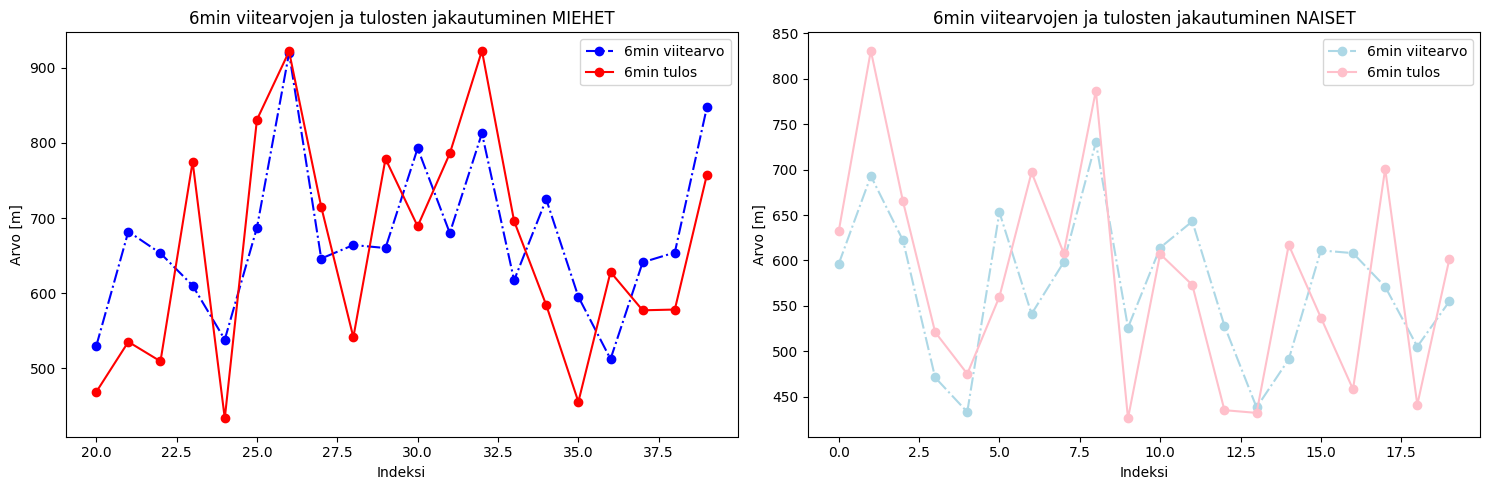

In [119]:
#erotetaan kahdeksi dataframeksi
data_mies = data[data['Sukupuoli']=='mies']
data_nainen = data[data['Sukupuoli']== 'nainen']

fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(data_mies.index, data_mies['6min viitearvo'], marker='o', linestyle='-.', color='b', label='6min viitearvo')
axes[0].plot(data_mies.index, data_mies['6min tulos'], marker='o', linestyle='-', color='r', label='6min tulos')
axes[0].set_title('6min viitearvojen ja tulosten jakautuminen MIEHET')
axes[0].set_xlabel('Indeksi')
axes[0].set_ylabel('Arvo [m]')
axes[0].legend(loc='best')

axes[1].plot(data_nainen.index, data_nainen['6min viitearvo'], marker='o', linestyle='-.', color='lightblue', label='6min viitearvo')
axes[1].plot(data_nainen.index, data_nainen['6min tulos'], marker='o', linestyle='-', color='pink', label='6min tulos')
axes[1].set_title('6min viitearvojen ja tulosten jakautuminen NAISET')
axes[1].set_xlabel('Indeksi')
axes[1].set_ylabel('Arvo [m]')
axes[1].legend(loc='best')

# Näytetään kuvaaja
plt.tight_layout()
plt.show()

## Generoidaan syke arvoja (tarvitaan miesten vo2max kaavassa)

Hyödynnetään tietoa maksimisykkeen tasosta : 220 - ikä. Arvotaan rasitustasoksi 6 minuutin kävelytestin lopussa 0.6-0.9 maksimisykkeestä. Lisätään tukisarakkeeksi tieto intensiteettitasosta (loppusyke suhteessa maksimisykkeeseen).

In [120]:
# Generate end heart rates
def syke_generaatio(ikä, bmi):
    max_taso = 220 - ikä  # Maximum heart rate
    intensiteetti = np.random.uniform(0.5,0.7)  #muutettu, aiemmin (0.6 , 0.9)
    return int(max_taso * intensiteetti)
    

data['syke testin lopussa'] = data.apply(lambda row: syke_generaatio(row['Ikä'], row['BMI']), axis=1)

# Display the new columns
data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa
0,nainen,37,161.2,86.3,33.2,1980,40.0,34.5,51.8,19.8,0.38,596,632,105
1,nainen,18,166.9,96.9,34.8,2228,38.5,37.3,59.6,21.3,0.36,693,831,102
2,nainen,30,168.3,98.8,34.9,2190,40.0,39.5,59.3,25.2,0.42,622,665,100
3,nainen,50,171.2,117.1,40.0,2305,40.0,46.8,70.3,27.7,0.39,471,521,113
4,nainen,64,155.5,84.1,34.8,1787,40.0,33.6,50.5,17.2,0.34,433,475,103


In [121]:
def testi_syke_maksimista(syke, ikä):
    max_syke = 220-ikä
    suhde = syke/max_syke
    return round(suhde, 2)

In [122]:
data['testisyke/max syke'] = data.apply(lambda row: testi_syke_maksimista(row['syke testin lopussa'], row['Ikä']),  axis=1)
data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke
0,nainen,37,161.2,86.3,33.2,1980,40.0,34.5,51.8,19.8,0.38,596,632,105,0.57
1,nainen,18,166.9,96.9,34.8,2228,38.5,37.3,59.6,21.3,0.36,693,831,102,0.50
2,nainen,30,168.3,98.8,34.9,2190,40.0,39.5,59.3,25.2,0.42,622,665,100,0.53
3,nainen,50,171.2,117.1,40.0,2305,40.0,46.8,70.3,27.7,0.39,471,521,113,0.66
4,nainen,64,155.5,84.1,34.8,1787,40.0,33.6,50.5,17.2,0.34,433,475,103,0.66


## Lasketaan Vo2max arvot - Maksmimaalinen hapenottokyky ml/kg/min

**Datatype:** int

**UKK:n 6 minuutin kävelytestin mukaan arvioitu Vo2max (Mänttäri et al.2018)**

Naiset: Vo2max= 22.506-0.271*(paino)+0.051*(kävelymatka)-0.065*(ikä)

Miehet: Vo2max= 110.546+0.063*(kävelymatka)-0.250*(ikä)-0.486*(BMI)-0.420*(pituus)-0.109*(syke)


**RIIPPUVUUS**:
*  paino

*  kävelymatka

*  ikä

*  syke (miehillä)

*In healthy subjects, the 6-min walk distance (6MWD) ranges from 400 to 700 m, the main predictor variables being gender, age and height*  
https://www.sciencedirect.com/science/article/pii/S0954611106000060


In [123]:
def vo2max_value(sukupuoli, ikä, pituus, paino, bmi, kävelymatka, syke): 
    if sukupuoli == 'mies':
        value = 110.546+ 0.063*kävelymatka - 0.250*ikä - 0.468*bmi - 0.420*pituus - 0.109*syke
    else:
        value = 22.506- 0.271*paino + 0.051*kävelymatka - 0.065*ikä
    return int(round(value))

In [124]:
data['vo2max'] = data.apply(lambda row: vo2max_value(row['Sukupuoli'],row['Ikä'], row['Pituus (cm)'],row['Paino (kg)'],row['BMI'],row['6min tulos'],row['syke testin lopussa']), axis=1)

data

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke,vo2max
0,nainen,37,161.2,86.3,33.2,1980,40.0,34.5,51.8,19.8,0.38,596,632,105,0.57,29
1,nainen,18,166.9,96.9,34.8,2228,38.5,37.3,59.6,21.3,0.36,693,831,102,0.50,37
2,nainen,30,168.3,98.8,34.9,2190,40.0,39.5,59.3,25.2,0.42,622,665,100,0.53,28
3,nainen,50,171.2,117.1,40.0,2305,40.0,46.8,70.3,27.7,0.39,471,521,113,0.66,14
4,nainen,64,155.5,84.1,34.8,1787,40.0,33.6,50.5,17.2,0.34,433,475,103,0.66,20
5,nainen,42,156.6,44.2,18.0,1449,29.6,13.1,31.1,9.3,0.30,653,560,89,0.50,36
6,nainen,51,164.1,77.6,28.8,1815,40.0,31.0,46.6,15.9,0.34,541,697,94,0.56,34
7,nainen,43,166.7,75.0,27.0,1839,39.0,29.2,45.8,16.0,0.35,598,608,116,0.66,30
8,nainen,20,160.0,69.6,27.2,1875,31.5,21.9,47.7,20.3,0.43,730,787,126,0.63,42
9,nainen,61,160.2,55.3,21.6,1488,36.2,20.0,35.3,23.1,0.65,526,426,94,0.59,25


## Lisätään kuntotason mukaan maksimaalisesta hapenottokyvystä (tarvitaan tätä tietoa ehkä lihasvoiman generoinnissa)


Asteikko näkyy kuvana alla. Datataulukkoon arvot muutetaan numeerisiksi seuraavalla tavalla:

|Arvo| Sanallinen kuvaus|
|---|:---:|
|1| Heikko|  
|2| Huono|
|3| Välttävä|
|4| Keskimääräinen
|5| Hyvä|
|6| Erittäin hyvä|
|7| Erinomainen|



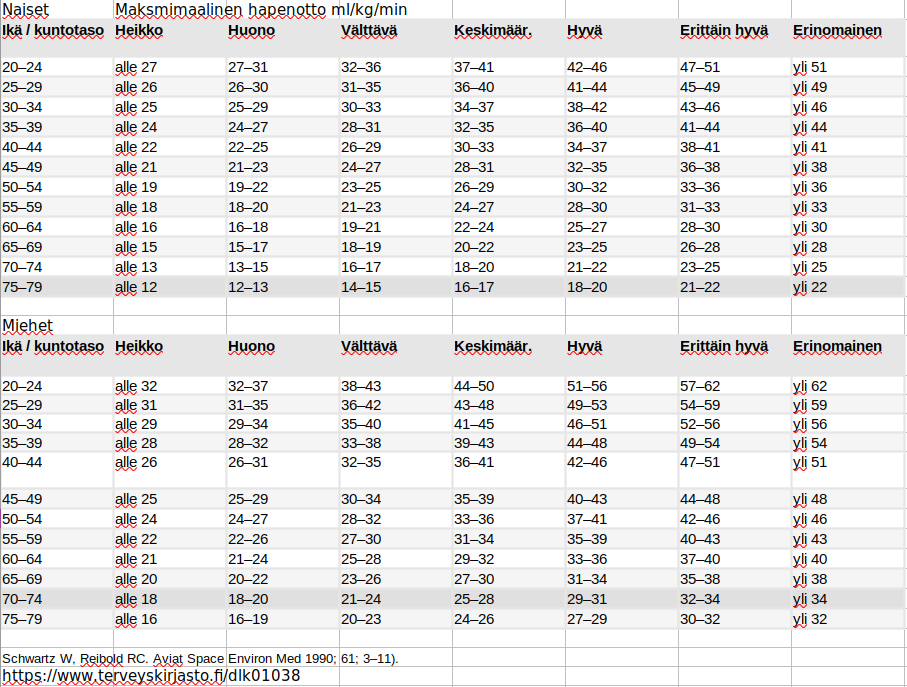

In [125]:
from IPython.display import Image, display

# Näytetään kuva
display(Image(filename='./images/kestavyys_viitearvot.png'))

In [126]:
#funktio kuntotason lisäämiseen

def get_kuntotaso(sex, age, vo2max):
    if sex == 'mies':
        if 18 <= age <= 24:      # changed from 20 to 18
            thresholds = [32, 37, 43, 50, 56, 62]
        elif 25 <= age <= 29:
            thresholds = [31, 35, 42, 48, 53, 59]
        elif 30 <= age <= 34:
            thresholds = [29, 34, 40, 45, 51, 56]
        elif 35 <= age <= 39:
            thresholds = [28, 32, 38, 43, 48, 54]
        elif 40 <= age <= 44:
            thresholds = [26, 31, 35, 41, 46, 51]
        elif 45 <= age <= 49:
            thresholds = [25, 29, 34, 39, 43, 48]
        elif 50 <= age <= 54:
            thresholds = [24, 27, 32, 36, 41, 46]
        elif 55 <= age <= 59:
            thresholds = [22, 26, 30, 34, 39, 43]
        elif 60 <= age <= 64:
            thresholds = [21, 24, 28, 32, 36, 40]
        elif 65 <= age <= 69:
            thresholds = [20, 22, 26, 30, 34, 38]
        elif 70 <= age <= 74:
            thresholds = [18, 20, 24, 28, 31, 34]
        elif 75 <= age <= 79:
            thresholds = [16, 19, 23, 26, 29, 32]
        else:
            return None  # Age out of range
    
    else:
        if 18 <= age <= 24:    # changed from 20 to 18
            thresholds = [27, 31, 36, 41, 46, 51]
        elif 25 <= age <= 29:
            thresholds = [26, 30, 35, 40, 44, 49]
        elif 30 <= age <= 34:
            thresholds = [25, 29, 33, 37, 42, 46]
        elif 35 <= age <= 39:
            thresholds = [24, 27, 31, 35, 40, 44]
        elif 40 <= age <= 44:
            thresholds = [22, 25, 29, 33, 37, 41]
        elif 45 <= age <= 49:
            thresholds = [21, 23, 27, 31, 35, 38]
        elif 50 <= age <= 54:
            thresholds = [19, 22, 25, 29, 32, 36]
        elif 55 <= age <= 59:
            thresholds = [18, 20, 23, 27, 30, 33]
        elif 60 <= age <= 64:
            thresholds = [16, 18, 21, 24, 27, 30]
        elif 65 <= age <= 69:
            thresholds = [15, 17, 19, 22, 25, 28]
        elif 70 <= age <= 74:
            thresholds = [13, 15, 17, 20, 22, 25]
        elif 75 <= age <= 79:
            thresholds = [12, 13, 15, 17, 20, 22]
        else:
            return None  # Age out of range

    for i, threshold in enumerate(thresholds):
        if vo2max < threshold:
            return i + 1  # Adding 1 because kuntotaso starts from 1, not 0
    return  7  # If vo2max is higher than all thresholds
    

In [127]:
data['Kuntotaso vo2max (1-7)'] = data.apply(lambda row: get_kuntotaso(row['Sukupuoli'], row['Ikä'], row['vo2max']), axis=1)

data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke,vo2max,Kuntotaso vo2max (1-7)
0,nainen,37,161.2,86.3,33.2,1980,40.0,34.5,51.8,19.8,0.38,596,632,105,0.57,29,3
1,nainen,18,166.9,96.9,34.8,2228,38.5,37.3,59.6,21.3,0.36,693,831,102,0.50,37,4
2,nainen,30,168.3,98.8,34.9,2190,40.0,39.5,59.3,25.2,0.42,622,665,100,0.53,28,2
3,nainen,50,171.2,117.1,40.0,2305,40.0,46.8,70.3,27.7,0.39,471,521,113,0.66,14,1
4,nainen,64,155.5,84.1,34.8,1787,40.0,33.6,50.5,17.2,0.34,433,475,103,0.66,20,3


### Tarkastellaan kuntotasojen jakautumista

In [128]:
naiset = data[data['Sukupuoli']=='nainen']
kuntotaso_counts_naiset = naiset['Kuntotaso vo2max (1-7)'].value_counts().sort_index()

miehet = data[data['Sukupuoli']=='mies']
kuntotaso_counts_miehet = miehet['Kuntotaso vo2max (1-7)'].value_counts().sort_index()

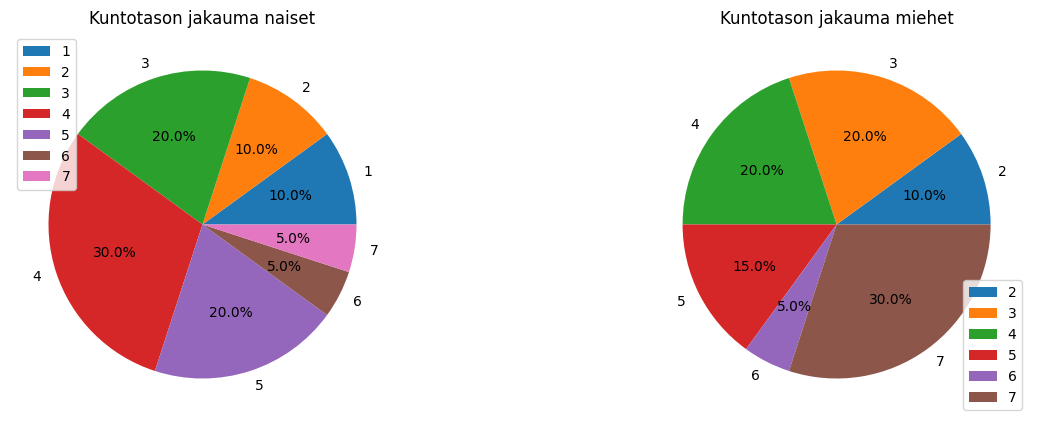

In [129]:
# Piirakkakaavion piirtäminen
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].pie(kuntotaso_counts_naiset,labels=kuntotaso_counts_naiset.index, autopct='%1.1f%%')
axes[0].set_title('Kuntotason jakauma naiset')
axes[0].legend()

axes[1].pie(kuntotaso_counts_miehet,labels=kuntotaso_counts_miehet.index, autopct='%1.1f%%')
axes[1].set_title('Kuntotason jakauma miehet')
axes[1].legend()

plt.show()

### Lihasvoima: maksimivoima jalkaprässistä

Luodaan riippuvuus kehonpainoon sekä lihasmassaan. Oikeassa tilanteessa 1 RM eli yhden toiston maksimikuorma voidaan arvioida kaavalla `1 RM = (0.033*toistot*kuorma) + kuorma`

Mahdollisia tapoja edetä generaatiossa:
1. Hyödynnetään kokonaispainon määrää kuorman määrityksessä, lisätään kohinaa ja arvotaan toistomäärä
2. Arvioidaan yhden lihasmassakilon tuottama voimamäärä, lisätään kohinaa ja kerrotaan lihasmassan määrällä
3. 1 RM kaavan hyödyntäminen, vaatisi toistojen ja kuormien generointia (kokonaispainosta riippuen kuorma ja toistot arpoen?)

Lukemani perusteella lihasmassa määrittelee voimatasoja datamme piirteistä parhaiten. Esimerkiksi sukupuoli sinänsä ei vaikuta voimatasoihin vaan kehonkoostumus (naisilla yleensä enemmän rasvaa, miehet pidempiä ja enemmän lihasmassaa). Valitsen siis tavan 1. 

In [130]:
def one_rep_max(toistot, kuorma):
    rm = (0.033*toistot*kuorma) + kuorma
    return rm

In [131]:
print(one_rep_max(4,250))

283.0


In [95]:
#list1 = data[['Lihasmassa (kg)', 'Paino (kg)' ]]
#list2 = list1.values.tolist()


In [134]:
def generate_leg_press_max_force(muscle_mass_kg):
    base_force_per_kg = 8  # keskimääräinen voima per lihaskilo
    variability = np.random.uniform(-2, 2)  # Lisää satunnaista vaihtelua
    
    # Maksimivoima-arvo lasketaan
    max_force = muscle_mass_kg * (base_force_per_kg + variability)
    return round(max_force)

In [135]:
data['Maksimivoima (kg)'] = data.apply(lambda row: generate_leg_press_max_force(row['Lihasmassa (kg)']), axis=1)
data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke,vo2max,Kuntotaso vo2max (1-7),Maksimivoima (kg)
0,nainen,37,161.2,86.3,33.2,1980,40.0,34.5,51.8,19.8,0.38,596,632,105,0.57,29,3,132
1,nainen,18,166.9,96.9,34.8,2228,38.5,37.3,59.6,21.3,0.36,693,831,102,0.50,37,4,144
2,nainen,30,168.3,98.8,34.9,2190,40.0,39.5,59.3,25.2,0.42,622,665,100,0.53,28,2,194
3,nainen,50,171.2,117.1,40.0,2305,40.0,46.8,70.3,27.7,0.39,471,521,113,0.66,14,1,219
4,nainen,64,155.5,84.1,34.8,1787,40.0,33.6,50.5,17.2,0.34,433,475,103,0.66,20,3,130


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sukupuoli                        40 non-null     object 
 1   Ikä                              40 non-null     int64  
 2   Pituus (cm)                      40 non-null     float64
 3   Paino (kg)                       40 non-null     float64
 4   BMI                              40 non-null     float64
 5   Vuorokausiaineenvaihdunta        40 non-null     int64  
 6   Rasvaprosentti                   40 non-null     float64
 7   Rasvamassa (kg)                  40 non-null     float64
 8   Rasvaton massa (kg)              40 non-null     float64
 9   Lihasmassa (kg)                  40 non-null     float64
 10  Lihasmassan osuus rasvattomasta  40 non-null     float64
 11  6min viitearvo                   40 non-null     int64  
 12  6min tulos              

In [145]:
# Varmistetaan, että laskenta toimii suoraan ilman apply-metodia
data['maksimivoima/paino'] = (data['Maksimivoima (kg)'] / data['Paino (kg)']).round(2)

data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke,vo2max,Kuntotaso vo2max (1-7),Maksimivoima (kg),maksimivoima/paino
0,nainen,37,161.2,86.3,33.2,1980,40.0,34.5,51.8,19.8,0.38,596,632,105,0.57,29,3,132,1.53
1,nainen,18,166.9,96.9,34.8,2228,38.5,37.3,59.6,21.3,0.36,693,831,102,0.50,37,4,144,1.49
2,nainen,30,168.3,98.8,34.9,2190,40.0,39.5,59.3,25.2,0.42,622,665,100,0.53,28,2,194,1.96
3,nainen,50,171.2,117.1,40.0,2305,40.0,46.8,70.3,27.7,0.39,471,521,113,0.66,14,1,219,1.87
4,nainen,64,155.5,84.1,34.8,1787,40.0,33.6,50.5,17.2,0.34,433,475,103,0.66,20,3,130,1.55


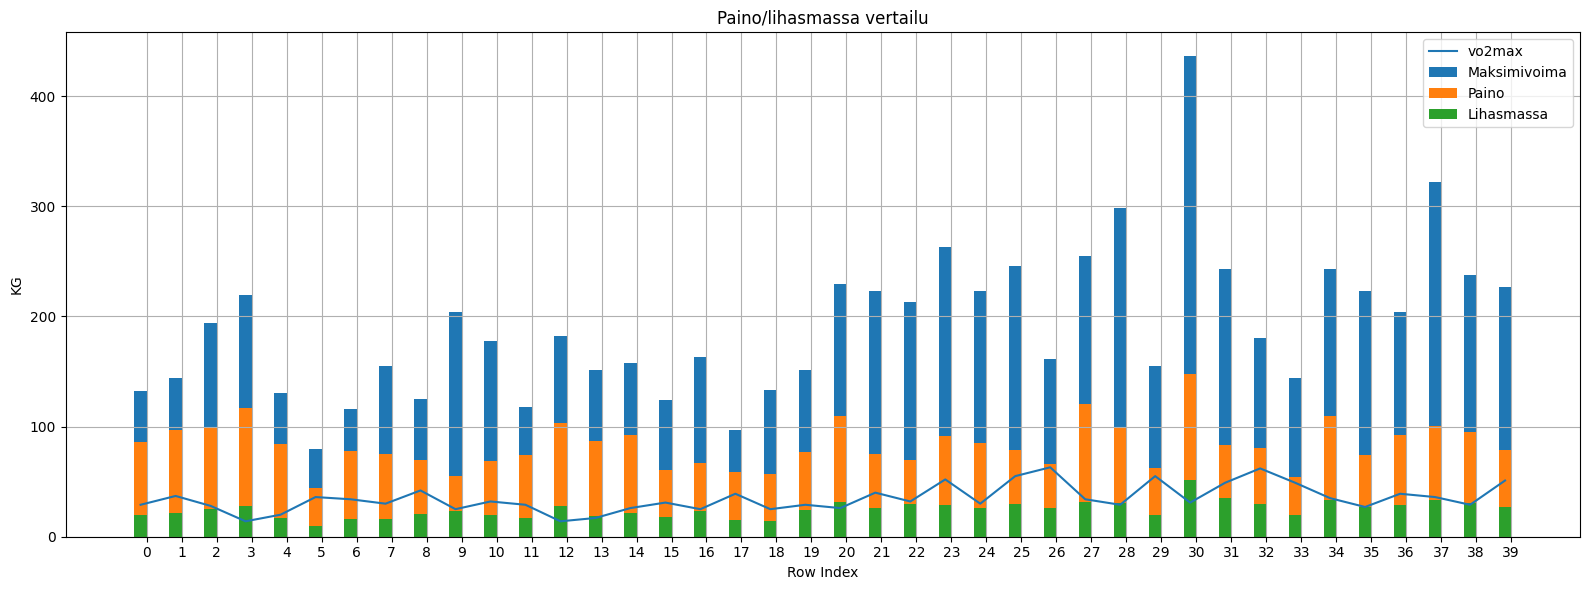

In [157]:
plt.figure(figsize=(16, 6))
bar_width = 0.35
index = range(len(data))

plt.bar(index, data['Maksimivoima (kg)'], bar_width, label='Maksimivoima')
plt.bar(index, data['Paino (kg)'], bar_width, label='Paino')
plt.bar(index, data['Lihasmassa (kg)'], bar_width, label='Lihasmassa')

plt.plot(data['vo2max'], label='vo2max')
plt.xlabel('Row Index')
plt.ylabel('KG')
plt.title('Paino/lihasmassa vertailu')
plt.legend()
plt.xticks([i + bar_width/2 for i in index], index)
plt.tight_layout()
plt.grid()
plt.show()

In [158]:
data.sort_values(by=['Sukupuoli', 'Ikä'], inplace=True)
data

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke,vo2max,Kuntotaso vo2max (1-7),Maksimivoima (kg),maksimivoima/paino
26,mies,20,191.0,66.4,18.2,2226,8.0,5.3,61.1,25.8,0.42,920,922,112,0.56,63,7,161,2.42
32,mies,22,181.6,80.8,24.5,2396,15.9,12.8,68.0,29.3,0.43,813,923,124,0.63,62,7,180,2.23
39,mies,22,185.8,79.0,22.9,2391,12.8,10.1,68.9,26.7,0.39,848,758,120,0.61,51,5,227,2.87
21,mies,33,170.2,75.1,25.9,2154,24.1,18.1,57.0,26.1,0.46,682,535,113,0.60,40,4,223,2.97
34,mies,33,183.8,109.2,32.3,2807,30.0,32.8,76.4,33.1,0.43,725,584,108,0.58,35,3,243,2.23
30,mies,34,202.5,147.6,36.0,3555,26.2,38.7,108.9,51.5,0.47,793,689,115,0.62,31,2,436,2.95
25,mies,38,175.0,78.6,25.7,2206,18.7,14.7,63.9,29.6,0.46,687,831,114,0.63,55,7,246,3.13
37,mies,39,174.7,100.3,32.9,2561,25.4,25.5,74.8,33.2,0.44,641,577,115,0.64,36,3,322,3.21
31,mies,44,179.2,83.2,25.9,2266,29.0,24.1,59.1,34.9,0.59,680,786,116,0.66,49,6,243,2.92
23,mies,45,172.5,91.3,30.7,2354,30.0,27.4,63.9,28.5,0.45,610,775,88,0.50,52,7,263,2.88


# MÄÄRITÄ DATAN SISÄLTÄVÄN CSV-TIEDOSTON NIMI!!

In [159]:
uusi_nimi = '08-19-data'

In [160]:
data.to_csv(f'data/{uusi_nimi}.csv', index=False)

### Pieni testi sanakirjasta sarakkeen datana

In [51]:
a = {'sukupuoli' : ['nainen', 'nainen'],
     'ikä': [30, 40],
     
     'painot' :[{'eka': 50, 3: 49, 6: 48}, {'eka': 60, 3: 58, 6: 56}], 
     'kuntotaso' : [ 1, 2]
}

da = pd.DataFrame(data=a)
da

,sukupuoli,ikä,painot,kuntotaso
0,nainen,30,"{'eka': 50, 3: 49, 6: 48}",1
1,nainen,40,"{'eka': 60, 3: 58, 6: 56}",2


In [53]:
da.to_excel('excel-files/dict2.xlsx')